# TRAINS

In [ ]:
# Checking GPU Configuration
!nvidia-smi

In [ ]:
# FYP Experiment 1
# Sentence Transformer  for Word-Level BERT Embedding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installing/Downloading required packages into this notebook
!pip install sentence-transformers

In [ ]:
import numpy as np
from keras.models import load_model

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# NLTK Word Tokenization without Punctuation

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
import nltk
nltk.download("punkt")

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model

In [ ]:
def charCNN_input_preprocess(text):
  '''
  Takes input sentence
  Preprocesses - lowers, character level tokenization & padding
  Returns preprocessed input
  '''
  input_text = np.array([text])#np.array(["Show me flights from Mumbai to Delhi..!!!"])
  input_text = [s.lower() for s in input_text]
  tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
  tk.fit_on_texts(input_text)

  alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
  char_dict = {}
  for i, char in enumerate(alphabet):
      char_dict[char] = i + 1

  tk.word_index = char_dict.copy()
  tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

  input_sequence = tk.texts_to_sequences(input_text)
  input_data = pad_sequences(input_sequence, maxlen=1014, padding='post')
  input_data = np.array(input_data, dtype='float32')

  return input_data

In [ ]:
# CharCNN Model Loading
charCNN_model = load_model("/content/drive/MyDrive/SavedModels/charCNN")

In [ ]:
def create_intelligent_word_embedding(text):
  '''
  Takes an input query text
  Finds BERT Embedding of each word
  Finds charCNN embedding of each word
  Concatenates the above two for each word
  Returns a list of the above word representations
  '''
  charcnn_embedding = []
  bert_embedding = []
  final_embedding = []
  word_list = text.split(" ")

  for i,word in enumerate(word_list):
    bert_embedding.append(model.encode(word))
    #print("1")
    charcnn_embedding.append(np.squeeze(charCNN_model.predict(np.expand_dims(charCNN_input_preprocess(word)[0],axis = 0)),axis=0))

    final_embedding.append(np.concatenate([bert_embedding[i],charcnn_embedding[i]]))

  return final_embedding, bert_embedding, charcnn_embedding

In [ ]:
train_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_train.pkl")
valid_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_valid.pkl")
test_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_test.pkl")

In [ ]:
# Sample Embedding
index = int(input("Enter index: "))
print("Input Query: " + train_df.iloc[index, 0])
print("BERT Embedding Shape: " , np.array(train_df.iloc[index, 4]).shape)
print("CharCNN Embedding Shape: ", np.array(train_df.iloc[index, 5]).shape)
print("Intelligent Concatenated Word Representation Shape: ", np.array(train_df.iloc[index, 6]).shape)

Enter index: 1
Input Query: alright so uh from Elmira we bring uh two boxcars
BERT Embedding Shape:  (24, 384)
CharCNN Embedding Shape:  (24, 100)
Intelligent Concatenated Word Representation Shape:  (24, 484)


In [ ]:
print("\nIntelligent Concatenated Word Representation: ", train_df.iloc[index, 6])


Intelligent Concatenated Word Representation:  [array([ 2.31902316e-01,  1.65233120e-01, -6.34098053e-02, -1.28663883e-01,
       -3.29342246e-01, -2.20244363e-01,  7.93489039e-01,  2.17716932e-01,
        2.67770976e-01, -8.74899700e-02,  4.66963090e-02, -4.13816601e-01,
        1.32637024e-01, -1.78299710e-01,  5.50036728e-01, -7.88643360e-02,
        8.95198882e-02, -3.23214084e-02, -7.25973427e-01, -2.65618861e-02,
       -1.86082110e-01, -9.92509127e-02,  1.53028414e-01,  2.51578540e-02,
        3.71157490e-02,  8.50515291e-02,  1.18764251e-01,  3.81129950e-01,
       -5.91679327e-02, -2.69391865e-01,  1.50071487e-01, -2.64612231e-02,
        8.56481027e-03, -2.02168182e-01, -3.95467691e-02,  4.51100826e-01,
        2.29259446e-01,  3.25900793e-01, -1.78465679e-01,  1.74671933e-01,
        2.75371000e-02, -2.52248138e-01, -3.56110707e-02,  2.41501793e-01,
        4.44136053e-01,  5.48329204e-02, -1.69424236e-01,  2.27253750e-01,
        2.33851239e-01,  7.15662614e-02, -3.5053011

In [ ]:
print("\nBERT Embedding: ", train_df.iloc[index, 4])


BERT Embedding:  [array([ 2.31902316e-01,  1.65233120e-01, -6.34098053e-02, -1.28663883e-01,
       -3.29342246e-01, -2.20244363e-01,  7.93489039e-01,  2.17716932e-01,
        2.67770976e-01, -8.74899700e-02,  4.66963090e-02, -4.13816601e-01,
        1.32637024e-01, -1.78299710e-01,  5.50036728e-01, -7.88643360e-02,
        8.95198882e-02, -3.23214084e-02, -7.25973427e-01, -2.65618861e-02,
       -1.86082110e-01, -9.92509127e-02,  1.53028414e-01,  2.51578540e-02,
        3.71157490e-02,  8.50515291e-02,  1.18764251e-01,  3.81129950e-01,
       -5.91679327e-02, -2.69391865e-01,  1.50071487e-01, -2.64612231e-02,
        8.56481027e-03, -2.02168182e-01, -3.95467691e-02,  4.51100826e-01,
        2.29259446e-01,  3.25900793e-01, -1.78465679e-01,  1.74671933e-01,
        2.75371000e-02, -2.52248138e-01, -3.56110707e-02,  2.41501793e-01,
        4.44136053e-01,  5.48329204e-02, -1.69424236e-01,  2.27253750e-01,
        2.33851239e-01,  7.15662614e-02, -3.50530118e-01,  1.51747808e-01,
      

In [ ]:
print("\nCharCNN Embedding: ", train_df.iloc[index, 5])


CharCNN Embedding:  [array([0.9620004 , 0.        , 1.2165515 , 0.        , 0.7001202 ,
       0.        , 1.4220388 , 0.05982122, 0.79841614, 1.517122  ,
       0.        , 0.36067742, 0.        , 0.8321941 , 1.2603669 ,
       0.        , 0.        , 0.54629326, 0.9680842 , 1.3488802 ,
       0.        , 0.35696313, 0.542168  , 1.2221024 , 0.26828927,
       0.96800196, 0.44237804, 0.24675098, 1.20941   , 1.3402786 ,
       0.88462853, 0.47121418, 0.68158484, 0.        , 0.        ,
       0.7066314 , 1.4395748 , 0.13860816, 0.3291201 , 0.        ,
       0.        , 0.        , 1.0211809 , 0.830832  , 0.        ,
       0.6624733 , 0.        , 0.        , 0.08371678, 0.09087044,
       0.        , 1.2155467 , 0.74736875, 0.66245097, 0.33974043,
       1.0285767 , 0.12979272, 0.18740198, 0.27342975, 0.99586844,
       0.59755933, 0.        , 0.11815177, 0.9534593 , 0.        ,
       0.5227615 , 0.        , 0.52483726, 1.1741782 , 0.6523852 ,
       1.064513  , 1.0615203 , 0.       

In [ ]:
# Overall dataframe to gauge the max world length of each sentence
df = pd.concat([train_df, valid_df, test_df], axis=0,ignore_index=True)

In [ ]:
def find_max_words(query_col) :
  return max(query_col.str.split().apply(len))

find_max_words(df["sentences"])

47

In [ ]:
df["sentences"].str.split().apply(len).value_counts()

In [ ]:
query_col = []
a=[query_col.append(text.split(" ")) for text in df["sentences"]]

In [ ]:
from keras.preprocessing.sequence import pad_sequences
#padded = pad_sequences(sequences=query_col, maxlen=46, dtype=object, padding='post', value="<UNK>")
padded = pad_sequences(sequences=query_col, maxlen=47, dtype=object, padding='post', truncating='post', value="<UNK>")
res = [' '.join(ele) for ele in padded]

In [ ]:
df["intelligent_concatenated_representation"] = ""
df.drop("intelligent_concatenated_word_representation",axis = 1, inplace=True)

In [ ]:
df["padded_sentences"] = res

# Splitting back to train and validation sets
train_df = df[:4819]
valid_df = df[4819:5355].reset_index(drop=True)
test_df = df[5355:].reset_index(drop=True)

In [ ]:
series = train_df["padded_sentences"].progress_apply(create_intelligent_word_embedding)
train_df["intelligent_concatenated_representation"] = pd.DataFrame(series.tolist())[0].tolist()
train_df["bert_embeddings"] = pd.DataFrame(series.tolist())[1].tolist()
train_df["charcnn_embeddings"] = pd.DataFrame(series.tolist())[2].tolist()
train_df.to_pickle("/content/drive/MyDrive/max_length_trains_train.pkl")

100%|██████████| 4819/4819 [3:09:33<00:00,  2.36s/it]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [ ]:
series = valid_df["padded_sentences"].progress_apply(create_intelligent_word_embedding)
valid_df["intelligent_concatenated_representation"] = pd.DataFrame(series.tolist())[0].tolist()
valid_df["bert_embeddings"] = pd.DataFrame(series.tolist())[1].tolist()
valid_df["charcnn_embeddings"] = pd.DataFrame(series.tolist())[2].tolist()
valid_df.to_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_valid.pkl")

100%|██████████| 536/536 [13:40<00:00,  1.53s/it]


In [ ]:
series = test_df["padded_sentences"].progress_apply(create_intelligent_word_embedding)
test_df["intelligent_concatenated_representation"] = pd.DataFrame(series.tolist())[0].tolist()
test_df["bert_embeddings"] = pd.DataFrame(series.tolist())[1].tolist()
test_df["charcnn_embeddings"] = pd.DataFrame(series.tolist())[2].tolist()
test_df.to_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_test.pkl")

100%|██████████| 1336/1336 [32:26<00:00,  1.46s/it]


In [ ]:
pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_train.pkl')

## Dialogue Act Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
train_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_train.pkl')
valid_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_valid.pkl')
test_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_test.pkl')

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df = pd.concat([train_df,valid_df,test_df],axis = 0)
label_encoder.fit(df["dac"])
train_df['label_encoded_dac'] = label_encoder.transform(train_df['dac'])
valid_df['label_encoded_dac'] = label_encoder.transform(valid_df['dac'])
test_df['label_encoded_dac'] = label_encoder.transform(test_df['dac'])

dataset_train_classes = train_df['label_encoded_dac'].values
dataset_train_class_list = [x for x in dataset_train_classes]

dataset_valid_classes = valid_df['label_encoded_dac'].values
dataset_valid_class_list = [x for x in dataset_valid_classes]

dataset_test_classes = test_df['label_encoded_dac'].values
dataset_test_class_list = [x for x in dataset_test_classes]

from tensorflow.keras.utils import to_categorical
dataset_train_classes = to_categorical(dataset_train_class_list, num_classes = 5) #, num_classes = 27)
dataset_valid_classes = to_categorical(dataset_valid_class_list, num_classes = 5)
dataset_test_classes = to_categorical(dataset_test_class_list, num_classes = 5) #, num_classes = 27)

In [6]:
import numpy as np
y_train = dataset_train_classes
y_valid = dataset_valid_classes
y_test = dataset_test_classes

In [7]:
import numpy as np

def applyall(i):
    return np.asarray(i)

X_train = train_df['intelligent_concatenated_representation']
X_train = X_train.values
X_train = applyall(X_train)
X_train = np.stack(X_train)
print(X_train.shape)

X_valid = valid_df['intelligent_concatenated_representation']
X_valid = X_valid.values
X_valid = applyall(X_valid)
X_valid = np.stack(X_valid)
print(X_valid.shape)

X_test = test_df['intelligent_concatenated_representation']
X_test = X_test.values
X_test = applyall(X_test)
X_test = np.stack(X_test)
print(X_test.shape)

(4819, 24, 484)
(536, 24, 484)
(1336, 24, 484)


In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(4819, 24, 484)
(536, 24, 484)
(1336, 24, 484)
(4819, 5)
(536, 5)
(1336, 5)


In [ ]:
!pip install keras-self-attention

In [ ]:
import wandb
run = wandb.init(reinit=True)
wandb.init(project="AutomaticInquirySystem", entity="fyp-ais-2022")

In [9]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten, GlobalAveragePooling1D, Dropout, GRU, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import nltk
import re
from nltk.corpus import stopwords
from textblob import Word, TextBlob

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [10]:
import keras
from keras_self_attention import SeqSelfAttention

BATCH_SIZE = 128
EPOCHS = 25
EMBEDDING_DIM = 484
NUM_UNITS = 128
MAX_SEQ_LEN = 24


model = Sequential()
model.add(Input(shape=(MAX_SEQ_LEN,EMBEDDING_DIM), dtype='float64'))
model.add(Bidirectional( keras.layers.LSTM( units=128, return_sequences=True)))
model.add(Bidirectional(keras.layers.LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(keras.layers.LSTM(units=128, return_sequences=True)))

#89.35 % val - Multiplicative accuracy
model.add(SeqSelfAttention(
    attention_width=15,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-6),
    use_attention_bias=False,
    name='Attention',
))

model.add(Flatten())
model.add(keras.layers.Dense(units=5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 24, 256)          627712    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 24, 256)          394240    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          394240    
 nal)                                                            
                                                                 
 Attention (SeqSelfAttention  (None, 24, 256)          65536     
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6144)              0

In [ ]:
from wandb.keras import WandbCallback

callback = WandbCallback(
    monitor="val_loss", verbose=1, mode="min", save_weights_only=(False),
    log_weights=(False), log_gradients=(False), save_model=(True),
    training_data=(X_train, y_train), validation_data=(X_valid, y_valid), labels=list(label_encoder.inverse_transform(range(3))), predictions=36,
    generator=None, input_type=None, output_type=None, log_evaluation=(False),
    validation_steps=None, class_colors=None, log_batch_frequency=None,
    log_best_prefix="best_", save_graph=(True), validation_indexes=None,
    validation_row_processor=None, prediction_row_processor=None,
    infer_missing_processors=(True), log_evaluation_frequency=0,
)

In [11]:
#Fit the model on training data
history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data=(X_valid, y_valid),verbose=0)

In [ ]:
# run = wandb.init(reinit=True)

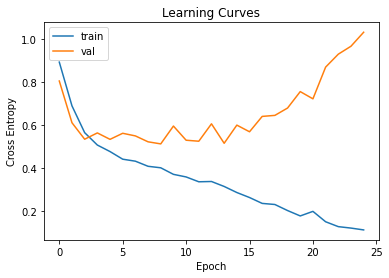

In [ ]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
#Evaluate the model performance on test data
model_score = model.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

In [14]:
import random
#Predict the dialogue acts
for i in random.sample(range(1, 1336), 7):
    #print(i)
    prediction = (model.predict(np.expand_dims(X_test[i],axis=0)) > 0.5).astype("int32")
    print("Input Query  "+test_df["sentences"][i])
    print("Expected DAC:  "+test_df["dac"][i])
    print("Predicted DAC: "+label_encoder.inverse_transform([np.argmax(prediction, axis=None, out=None)]))
    print('*'*75)

Input Query  sure I mean you can start you have to be careful you donot put two things on the same track and going in opposite directions 
Expected DAC:  INFO
['Predicted DAC: INFO']
***************************************************************************
Input Query  okay it takes three hours 
Expected DAC:  INFO
['Predicted DAC: INFO']
***************************************************************************
Input Query  that four hours 
Expected DAC:  INFO
['Predicted DAC: INFO']
***************************************************************************
Input Query  so we have to take an engine from Avon to Dansville in order to pick up the boxcar returning pick up the bananas 
Expected DAC:  INFO
['Predicted DAC: COMMAND']
***************************************************************************
Input Query  two hours 
Expected DAC:  INFO
['Predicted DAC: INFO']
***************************************************************************
Input Query  bring it back to Avon an

Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0    0.92399   0.78427   0.84842       496
           1    0.55385   0.56250   0.55814        64
           2    1.00000   0.91304   0.95455        23
           3    0.74189   0.88869   0.80868       566
           4    0.74834   0.60428   0.66864       187

    accuracy                        0.79491      1336
   macro avg    0.79361   0.75056   0.76768      1336
weighted avg    0.80583   0.79491   0.79434      1336



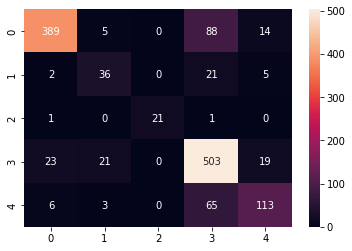

In [15]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
y_test = [np.argmax(y, axis=None, out=None) for y in y_test]
predictions = [np.argmax(y, axis=None, out=None) for y in predictions]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

print('Confusion Matrix')
cm = confusion_matrix(y_test, predictions)
print(sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt="d"))
print(classification_report(y_test, predictions, digits=5))

## Intents

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_train.pkl')
valid_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_valid.pkl')
test_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_test.pkl')

In [18]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df = pd.concat([train_df,valid_df,test_df],axis = 0)
label_encoder.fit(df["intents"])

train_df['label_encoded_intents'] = label_encoder.transform(train_df['intents'])
valid_df['label_encoded_intents'] = label_encoder.transform(valid_df['intents'])
test_df['label_encoded_intents'] = label_encoder.transform(test_df['intents'])

dataset_train_classes = train_df['label_encoded_intents'].values
dataset_train_class_list = [x for x in dataset_train_classes]

dataset_valid_classes = valid_df['label_encoded_intents'].values
dataset_valid_class_list = [x for x in dataset_valid_classes]

dataset_test_classes = test_df['label_encoded_intents'].values
dataset_test_class_list = [x for x in dataset_test_classes]

from tensorflow.keras.utils import to_categorical
dataset_train_classes = to_categorical(dataset_train_class_list, num_classes = 12) #, num_classes = 27)
dataset_valid_classes = to_categorical(dataset_valid_class_list, num_classes = 12)
dataset_test_classes = to_categorical(dataset_test_class_list, num_classes = 12) #, num_classes = 27)

In [19]:
import numpy as np
y_train = dataset_train_classes
y_valid = dataset_valid_classes
y_test = dataset_test_classes

In [20]:
import numpy as np

def applyall(i):
    return np.asarray(i)

X_train = train_df['intelligent_concatenated_representation']
X_train = X_train.values
X_train = applyall(X_train)
X_train = np.stack(X_train)
print(X_train.shape)

X_valid = valid_df['intelligent_concatenated_representation']
X_valid = X_valid.values
X_valid = applyall(X_valid)
X_valid = np.stack(X_valid)
print(X_valid.shape)

X_test = test_df['intelligent_concatenated_representation']
X_test = X_test.values
X_test = applyall(X_test)
X_test = np.stack(X_test)
print(X_test.shape)

(4819, 24, 484)
(536, 24, 484)
(1336, 24, 484)


In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(4819, 24, 484)
(536, 24, 484)
(1336, 24, 484)
(4819, 12)
(536, 12)
(1336, 12)


In [ ]:
!pip install keras-self-attention

In [ ]:
import wandb

wandb.init(project="AutomaticInquirySystem", entity="fyp-ais-2022")

In [ ]:
# run = wandb.init(reinit=True)

In [ ]:
import pandas as pd 
import numpy as np 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten, GlobalAveragePooling1D, Dropout, GRU, Input

import nltk
import re
from textblob import Word, TextBlob

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [21]:
import keras
from keras_self_attention import SeqSelfAttention

BATCH_SIZE = 128
EPOCHS = 25
EMBEDDING_DIM = 484
NUM_UNITS = 128
MAX_SEQ_LEN = 24


model = Sequential()
model.add(Input(shape=(MAX_SEQ_LEN,EMBEDDING_DIM), dtype='float64'))
model.add(Bidirectional( keras.layers.LSTM( units=128, return_sequences=True)))
model.add(Bidirectional(keras.layers.LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(keras.layers.LSTM(units=128, return_sequences=True)))

#89.35 % val - Multiplicative accuracy
model.add(SeqSelfAttention(
    attention_width=15,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-6),
    use_attention_bias=False,
    name='Attention',
))

model.add(Flatten())
model.add(keras.layers.Dense(units=12, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 24, 256)          627712    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 24, 256)          394240    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 24, 256)          394240    
 nal)                                                            
                                                                 
 Attention (SeqSelfAttention  (None, 24, 256)          65536     
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 6144)             

In [ ]:
from wandb.keras import WandbCallback

callback = WandbCallback(
    monitor="val_loss", verbose=1, mode="min", save_weights_only=(False),
    log_weights=(False), log_gradients=(False), save_model=(True),
    training_data=(X_train, y_train), validation_data=(X_valid, y_valid), labels=list(label_encoder.inverse_transform(range(16))), predictions=36,
    generator=None, input_type=None, output_type=None, log_evaluation=(False),
    validation_steps=None, class_colors=None, log_batch_frequency=None,
    log_best_prefix="best_", save_graph=(True), validation_indexes=None,
    validation_row_processor=None, prediction_row_processor=None,
    infer_missing_processors=(True), log_evaluation_frequency=0,
)

In [22]:
#Fit the model on training data
history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data=(X_valid, y_valid), verbose=0)

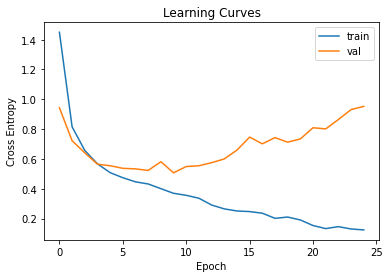

In [ ]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [23]:
#Evaluate the model performance on test data
model_score = model.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

11/11 [==============================] - 0s 35ms/step - loss: 1.3012 - accuracy: 0.7507


In [27]:
import random
#Predict the intents
for i in random.sample(range(1, 1336), 7):
    #print(i)
    prediction = (model.predict(np.expand_dims(X_test[i],axis=0)) > 0.5).astype("int32")
    print("Input Query  "+test_df["sentences"][i])
    print("Expected Intent:  "+test_df["intents"][i])
    print("Predicted Intent: "+label_encoder.inverse_transform([np.argmax(prediction, axis=None, out=None)]))
    print('*'*75)

Input Query  oh that that 
Expected Intent:  other
['Predicted Intent: other']
***************************************************************************
Input Query  on the way back right 
Expected Intent:  other
['Predicted Intent: other']
***************************************************************************
Input Query  um then once the OJ is turned into well once the oranges are turned into orange juice and loaded into the tankers 
Expected Intent:  item
['Predicted Intent: item']
***************************************************************************
Input Query  okay 
Expected Intent:  confirm
['Predicted Intent: confirm']
***************************************************************************
Input Query  okay 
Expected Intent:  confirm
['Predicted Intent: confirm']
***************************************************************************
Input Query  it five hours so far 
Expected Intent:  time
['Predicted Intent: time']
****************************************

Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0    0.22727   0.14286   0.17544        35
           1    0.64486   0.82143   0.72251        84
           2    0.93976   0.66102   0.77612       236
           3    0.18182   0.50000   0.26667        12
           4    1.00000   1.00000   1.00000         1
           5    0.63953   0.84615   0.72848        65
           6    1.00000   0.90476   0.95000        21
           7    0.65217   0.74586   0.69588       181
           8    0.68278   0.83395   0.75083       271
           9    0.00000   0.00000   0.00000         6
          10    0.92982   0.79500   0.85714       400
          11    0.52381   0.45833   0.48889        24

    accuracy                        0.74925      1336
   macro avg    0.61849   0.64245   0.61766      1336
weighted avg    0.77637   0.74925   0.75263      1336



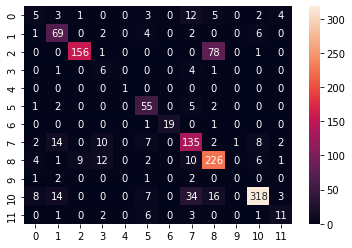

In [28]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
y_test = [np.argmax(y, axis=None, out=None) for y in y_test]
predictions = [np.argmax(y, axis=None, out=None) for y in predictions]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

print('Confusion Matrix')
cm = confusion_matrix(y_test, predictions)
print(sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt="d"))
print(classification_report(y_test, predictions, digits=5))

## Slot Filling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/ATIS/atis_train.pkl')
valid_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/ATIS/atis_valid.pkl')
test_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/ATIS/atis_test.pkl')

In [ ]:
import numpy as np

def applyall(i):
    return np.asarray(i)

X_train = train_df['intelligent_concatenated_representation']
X_train = X_train.values
X_train = applyall(X_train)
X_train = np.stack(X_train)
print(X_train.shape)

X_valid = valid_df['intelligent_concatenated_representation']
X_valid = X_valid.values
X_valid = applyall(X_valid)
X_valid = np.stack(X_valid)
print(X_valid.shape)

X_test = test_df['intelligent_concatenated_representation']
X_test = X_test.values
X_test = applyall(X_test)
X_test = np.stack(X_test)
print(X_test.shape)

(4480, 24, 484)
(498, 24, 484)
(893, 24, 484)


In [ ]:
df = pd.concat([train_df,valid_df,test_df],axis = 0)

In [29]:
import numpy as np
y_train = train_df['slots']
y_valid = valid_df['slots']
y_test = test_df['slots']

In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(4480, 24, 484)
(498, 24, 484)
(893, 24, 484)
(4480,)
(498,)
(893,)


In [ ]:
y_tokenizer.index_word

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils

NUM_WORDS = 10000
OOV_TOKEN = "<UNK>"

In [31]:
y_tokenizer = Tokenizer(filters = '', lower = False, split = ' ')
y_tokenizer.fit_on_texts(list(df["slots"]))

#Convert text to sequences
y_train_seq = y_tokenizer.texts_to_sequences(list(y_train))
y_valid_seq = y_tokenizer.texts_to_sequences(list(y_valid))
y_test_seq = y_tokenizer.texts_to_sequences(list(y_test))

In [32]:
MAX_SEQ_LEN = 24
y_train_padded = pad_sequences(y_train_seq, maxlen = MAX_SEQ_LEN, padding = 'post')
y_valid_padded = pad_sequences(y_valid_seq, maxlen = MAX_SEQ_LEN, padding = 'post')
y_test_padded = pad_sequences(y_test_seq, maxlen = MAX_SEQ_LEN, padding = 'post')

In [33]:
#Convert labels to one-hot vectors
y_train_encoded = utils.to_categorical(y_train_padded, num_classes = 33)
y_valid_encoded = utils.to_categorical(y_valid_padded, num_classes = 33)
y_test_encoded = utils.to_categorical(y_test_padded, num_classes = 33)
print(y_train_encoded.shape, y_valid_encoded.shape, y_test_encoded.shape)

(4819, 24, 33) (536, 24, 33) (1336, 24, 33)


In [ ]:
import wandb
run = wandb.init(reinit=True)
wandb.init(project="AutomaticInquirySystem", entity="fyp-ais-2022")

In [ ]:
from wandb.keras import WandbCallback

callback = WandbCallback(
    monitor="val_loss", verbose=1, mode="min", save_weights_only=(False),
    log_weights=(False), log_gradients=(False), save_model=(True),
    training_data=(X_train, y_train_encoded), validation_data=(X_valid, y_valid_encoded), labels=list(label_encoder.inverse_transform(range(16))), predictions=36,
    generator=None, input_type=None, output_type=None, log_evaluation=(False),
    validation_steps=None, class_colors=None, log_batch_frequency=None,
    log_best_prefix="best_", save_graph=(True), validation_indexes=None,
    validation_row_processor=None, prediction_row_processor=None,
    infer_missing_processors=(True), log_evaluation_frequency=0,
)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, TimeDistributed, Input
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 128
EPOCHS = 25
EMBEDDING_DIM = 484
NUM_UNITS = 128
VOCAB_SIZE = NUM_WORDS
Y_VOCAB_SIZE = 33  #len(y_tokenizer.word_index) + 1


#Define a Bi-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Input(shape=(MAX_SEQ_LEN,EMBEDDING_DIM)))

bilstm_model.add(Bidirectional(LSTM(NUM_UNITS,  return_sequences=True)))
bilstm_model.add(Bidirectional(LSTM(NUM_UNITS,  return_sequences=True)))
bilstm_model.add(Bidirectional(LSTM(NUM_UNITS, return_sequences=True)))

bilstm_model.add(TimeDistributed(Dense(Y_VOCAB_SIZE, activation='softmax')))


#Compile the model
bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Precision(), Recall(), 'accuracy'])

bilstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 24, 256)          627712    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 24, 256)          394240    
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 24, 256)          394240    
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 24, 33)           8481      
 ibuted)                                                         
                                                                 
Total params: 1,424,673
Trainable params: 1,424,673
No

In [35]:
#Fit the model on training data
bilstm_history = bilstm_model.fit(X_train, y_train_encoded, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data=(X_valid, y_valid_encoded),verbose=0)#,callbacks=[callback])

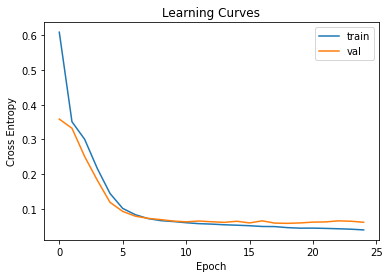

In [ ]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(bilstm_history.history['loss'], label='train')
pyplot.plot(bilstm_history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [36]:
#Evaluate the model performance on test data
bilstm_score = bilstm_model.evaluate(X_test, y_test_encoded, batch_size = BATCH_SIZE)

11/11 [==============================] - 0s 35ms/step - loss: 0.5957 - precision: 0.9467 - recall: 0.9416 - accuracy: 0.9438


In [39]:
label_list = list(y_tokenizer.word_index.keys())
index_list = list(y_tokenizer.word_index.values())

import random
#Predict the slots
for i in random.sample(range(1, 1336), 3):
    #print(i)
    prediction = bilstm_model.predict(np.expand_dims(X_test[i],axis=0))
    slots = [label_list[index_list.index(j)] for j in [np.argmax(x) for x in prediction[0][:]] if j in index_list][:-1]
    print("Input Query  "+test_df["sentences"][i])
    print()
    print("Expected Slots:  "+test_df["slots"][i])
    print()
    print("Predicted Slots: ",slots)
    print('*'*75)

Input Query  wait a minute um we have to make the orange juice 

Expected Slots:  O O O O O O O O O B-food I-food 

Predicted Slots:  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-food', 'I-food']
***************************************************************************
Input Query  uh five hours 

Expected Slots:  O B-time-duration I-time-duration 

Predicted Slots:  ['O', 'B-time-duration', 'I-time-duration']
***************************************************************************
Input Query  so at ten am we have one tanker of OJ at Bath 

Expected Slots:  O O B-time I-time O O B-number B-vehicle O B-code O B-city 

Predicted Slots:  ['O', 'O', 'B-time', 'I-time', 'O', 'O', 'B-number', 'B-vehicle', 'O', 'B-code', 'O', 'B-city']
***************************************************************************


# Intelligent Deep Concurrent Model

In [ ]:
!nvidia-smi

Sat Apr 30 16:57:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    36W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18912 sha256=c7a1fc94e31a2db390aa53a4e5003363dadcf2fb6869c030d16ef2a1bc7e38fb
  Stored in directory: /root/.cache/pip/wheels/95/b1/a8/5ee00cc137940b2f6fa198212e8f45d813d0e0d9c3a04035a3
Successfully built keras-self-attention


In [40]:
import pandas as pd 
import numpy as np 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten, GlobalAveragePooling1D, Dropout, GRU, Input, TimeDistributed

import nltk
import re
from textblob import Word, TextBlob

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

import keras
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.metrics import Precision, Recall

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils

from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.merge import add

In [ ]:
train_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_train.pkl')
valid_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_valid.pkl')
test_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/TRAINS/trains_test.pkl')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   sentences                                4819 non-null   object
 1   dac                                      4819 non-null   object
 2   intents                                  4819 non-null   object
 3   slots                                    4819 non-null   object
 4   bert_embeddings                          4819 non-null   object
 5   charcnn_embeddings                       4819 non-null   object
 6   intelligent_concatenated_representation  4819 non-null   object
 7   padded_sentences                         4819 non-null   object
dtypes: object(8)
memory usage: 301.3+ KB


In [43]:
def applyall(i):
    return np.asarray(i)

X_train = train_df['intelligent_concatenated_representation']
X_train = X_train.values
X_train = applyall(X_train)
X_train = np.stack(X_train)
print(X_train.shape)

X_valid = valid_df['intelligent_concatenated_representation']
X_valid = X_valid.values
X_valid = applyall(X_valid)
X_valid = np.stack(X_valid)
print(X_valid.shape)

X_test = test_df['intelligent_concatenated_representation']
X_test = X_test.values
X_test = applyall(X_test)
X_test = np.stack(X_test)
print(X_test.shape)

(4819, 24, 484)
(536, 24, 484)
(1336, 24, 484)


In [44]:
DISTINCT_SLOT   = 33
DISTINCT_INTENT = 12
DISTINCT_DA     =  5

MAX_SEQ_LEN = X_train[0].shape[0]   # 24
EMBEDDING_DIM = X_train[0].shape[1] # 484

## Dialogue Act Classification

In [45]:
dac_label_encoder = preprocessing.LabelEncoder()
df = pd.concat([train_df,valid_df,test_df],axis = 0)
dac_label_encoder.fit(df["dac"])
train_df['label_encoded_dac'] = dac_label_encoder.transform(train_df['dac'])
valid_df['label_encoded_dac'] = dac_label_encoder.transform(valid_df['dac'])
test_df['label_encoded_dac'] = dac_label_encoder.transform(test_df['dac'])

dataset_train_classes = train_df['label_encoded_dac'].values
dataset_train_class_list = [x for x in dataset_train_classes]

dataset_valid_classes = valid_df['label_encoded_dac'].values
dataset_valid_class_list = [x for x in dataset_valid_classes]

dataset_test_classes = test_df['label_encoded_dac'].values
dataset_test_class_list = [x for x in dataset_test_classes]

dataset_train_classes = to_categorical(dataset_train_class_list, num_classes = DISTINCT_DA)
dataset_valid_classes = to_categorical(dataset_valid_class_list, num_classes = DISTINCT_DA)
dataset_test_classes = to_categorical(dataset_test_class_list, num_classes = DISTINCT_DA)

In [46]:
dac_y_train = dataset_train_classes
dac_y_valid = dataset_valid_classes
dac_y_test = dataset_test_classes

## Intent Detection

In [47]:
intent_label_encoder = preprocessing.LabelEncoder()
df = pd.concat([train_df,valid_df,test_df],axis = 0)
intent_label_encoder.fit(df["intents"])

train_df['label_encoded_intents'] = intent_label_encoder.transform(train_df['intents'])
valid_df['label_encoded_intents'] = intent_label_encoder.transform(valid_df['intents'])
test_df['label_encoded_intents'] = intent_label_encoder.transform(test_df['intents'])

dataset_train_classes = train_df['label_encoded_intents'].values
dataset_train_class_list = [x for x in dataset_train_classes]

dataset_valid_classes = valid_df['label_encoded_intents'].values
dataset_valid_class_list = [x for x in dataset_valid_classes]

dataset_test_classes = test_df['label_encoded_intents'].values
dataset_test_class_list = [x for x in dataset_test_classes]

In [48]:
dataset_train_classes = to_categorical(dataset_train_class_list, num_classes = DISTINCT_INTENT)
dataset_valid_classes = to_categorical(dataset_valid_class_list, num_classes = DISTINCT_INTENT)
dataset_test_classes = to_categorical(dataset_test_class_list, num_classes = DISTINCT_INTENT) 

intent_y_train = dataset_train_classes
intent_y_valid = dataset_valid_classes
intent_y_test = dataset_test_classes

## Slot Filling

In [49]:
import numpy as np
slot_y_train = train_df['slots']
slot_y_valid = valid_df['slots']
slot_y_test = test_df['slots']

In [50]:
y_tokenizer = Tokenizer(filters = '', lower = False, split = ' ')
y_tokenizer.fit_on_texts(list(df["slots"]))

#Convert text to sequences
y_train_seq = y_tokenizer.texts_to_sequences(list(slot_y_train))
y_valid_seq = y_tokenizer.texts_to_sequences(list(slot_y_valid))
y_test_seq = y_tokenizer.texts_to_sequences(list(slot_y_test))

In [51]:
y_train_padded = pad_sequences(y_train_seq, maxlen = MAX_SEQ_LEN, padding = 'post')
y_valid_padded = pad_sequences(y_valid_seq, maxlen = MAX_SEQ_LEN, padding = 'post')
y_test_padded = pad_sequences(y_test_seq, maxlen = MAX_SEQ_LEN, padding = 'post')

#Convert labels to one-hot vectors
slot_y_train_encoded = utils.to_categorical(y_train_padded, num_classes = DISTINCT_SLOT)
slot_y_valid_encoded = utils.to_categorical(y_valid_padded, num_classes = DISTINCT_SLOT)
slot_y_test_encoded = utils.to_categorical(y_test_padded, num_classes = DISTINCT_SLOT)
print(slot_y_train_encoded.shape, slot_y_valid_encoded.shape, slot_y_test_encoded.shape)

(4819, 24, 33) (536, 24, 33) (1336, 24, 33)


# Multi Task Model Defining

In [52]:
from keras.layers.merge import add

In [53]:
BATCH_SIZE = 128
EPOCHS = 50
NUM_UNITS = 100
ATTENTION_WIDTH = 15

### Non Residual

In [ ]:
model_input = Input(shape=(MAX_SEQ_LEN,EMBEDDING_DIM), dtype='float64')
x = Bidirectional(LSTM( NUM_UNITS, return_sequences=True))(model_input)
x = Bidirectional(LSTM( NUM_UNITS, return_sequences=True))(x)
x = Bidirectional(LSTM( NUM_UNITS, return_sequences=True))(x)


x1 = SeqSelfAttention(
    attention_width=ATTENTION_WIDTH,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-6),
    use_attention_bias=False,
    name='Attention_dac',
)(x)
x1 = Flatten()(x1)

x2 = SeqSelfAttention(
    attention_width=ATTENTION_WIDTH,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-5),
    use_attention_bias=False,
    name='Attention_intent',
)(x)
x2 = Flatten()(x2)

y1=Dense(DISTINCT_DA,activation='softmax', name='Dialogue-Act-Classification')(x1)
y2=Dense(DISTINCT_INTENT,activation='softmax',name='Intent-Detection')(x2)
y3 = TimeDistributed(Dense(DISTINCT_SLOT, activation='softmax'), name = 'Slot-Filling')(x)

model=Model(inputs=model_input,outputs=[y1,y2,y3])

model.compile(loss='categorical_crossentropy',loss_weights = [1,3.5,4],
                  optimizer='adam',
                  metrics=['accuracy', Precision(), Recall()])

### Residual

In [ ]:
model_input = Input(shape=(MAX_SEQ_LEN,EMBEDDING_DIM), dtype='float64')
layer_1 = Bidirectional(LSTM( NUM_UNITS, return_sequences=True))(model_input)
#layer_1 = Dropout(0.5)(layer_1)
layer_2 = Bidirectional(LSTM( NUM_UNITS, return_sequences=True))(layer_1)
#layer_2 = Dropout(0.5)(layer_2)
add_1 = add([layer_1,layer_2])
layer_3 = Bidirectional(LSTM( NUM_UNITS, return_sequences=True))(add_1)
#layer_3 = Dropout(0.5)(layer_3)
add_2 = add([add_1,layer_3])

x1 = SeqSelfAttention(
    attention_width=ATTENTION_WIDTH,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-6),
    use_attention_bias=False,
    name='Attention_dac',
)(add_2)
x1 = Flatten()(x1)

x2 = SeqSelfAttention(
    attention_width=ATTENTION_WIDTH,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-5),
    use_attention_bias=False,
    name='Attention_intent',
)(add_2)
x2 = Flatten()(x2)

y1=Dense(DISTINCT_DA,activation='softmax', name='Dialogue-Act-Classification')(x1)
y2=Dense(DISTINCT_INTENT,activation='softmax',name='Intent-Detection')(x2)
y3 = TimeDistributed(Dense(DISTINCT_SLOT, activation='softmax'), name = 'Slot-Filling')(add_2)

model=Model(inputs=model_input,outputs=[y1,y2,y3])

model.compile(loss='categorical_crossentropy',loss_weights = [1,3.5,4],
                  optimizer='adam',
                  metrics=['accuracy', Precision(), Recall()])

###TRAINING

In [ ]:
plot_model(model)

In [ ]:
model.summary()

In [ ]:
ep = EarlyStopping(
    monitor='val_loss', 
    patience=7,
)
filepath = 'my_checkpoint.ckpt'
cp = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("multitask_trains_model_history_log.csv", append=True)

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 181 kB 46.7 MB/s 
     |████████████████████████████████| 144 kB 50.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=c37578c1c9645bfae8f4872eb782725ca9ddf477659e6b81201e9edcc802e79e
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import wandb

In [ ]:
wandb.login()

wandb: Currently logged in as: fyp-ais-2022 (use `wandb login --relogin` to force relogin)


True

In [ ]:
wandb.init(project="fyp")

In [ ]:
from wandb.keras import WandbCallback

callback = WandbCallback(
    monitor="val_loss", verbose=1, mode="min", save_weights_only=(False),
    log_weights=(False), log_gradients=(False), save_model=(True),
    generator=None, input_type=None, output_type=None, log_evaluation=(False),
    validation_steps=None, class_colors=None, log_batch_frequency=None,
    log_best_prefix="best_", save_graph=(True), validation_indexes=None,
    validation_row_processor=None, prediction_row_processor=None,
    infer_missing_processors=(True), log_evaluation_frequency=0,
)

In [ ]:
history = model.fit(X_train, [dac_y_train,intent_y_train,slot_y_train_encoded],
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        verbose=1,validation_data=(X_valid, [dac_y_valid,intent_y_valid, slot_y_valid_encoded]),callbacks=[callback])
                        #validation_data=(X_valid, [y_valid, dac_y_valid]))

Epoch 1/50
38/38 [==============================] - 43s 191ms/step - loss: 8.4070 - Dialogue-Act-Classification_loss: 0.8989 - Intent-Detection_loss: 1.4848 - Slot-Filling_loss: 0.5773 - Dialogue-Act-Classification_accuracy: 0.6806 - Dialogue-Act-Classification_precision: 0.7432 - Dialogue-Act-Classification_recall: 0.6107 - Intent-Detection_accuracy: 0.4713 - Intent-Detection_precision: 0.6913 - Intent-Detection_recall: 0.2565 - Slot-Filling_accuracy: 0.8699 - Slot-Filling_precision: 0.9288 - Slot-Filling_recall: 0.8350 - val_loss: 5.2902 - val_Dialogue-Act-Classification_loss: 0.7572 - val_Intent-Detection_loss: 0.9190 - val_Slot-Filling_loss: 0.3286 - val_Dialogue-Act-Classification_accuracy: 0.6922 - val_Dialogue-Act-Classification_precision: 0.8264 - val_Dialogue-Act-Classification_recall: 0.5597 - val_Intent-Detection_accuracy: 0.7500 - val_Intent-Detection_precision: 0.8492 - val_Intent-Detection_recall: 0.5989 - val_Slot-Filling_accuracy: 0.9211 - val_Slot-Filling_precision: 0.

In [ ]:
score = model.evaluate(X_test, [dac_y_test,intent_y_test,slot_y_test_encoded], batch_size=256, verbose=1)

6/6 [==============================] - 0s 55ms/step - loss: 5.5481 - Dialogue-Act-Classification_loss: 0.6613 - Intent-Detection_loss: 0.9827 - Slot-Filling_loss: 0.3564 - Dialogue-Act-Classification_accuracy: 0.8099 - Dialogue-Act-Classification_precision_9: 0.8155 - Dialogue-Act-Classification_recall_9: 0.8039 - Intent-Detection_accuracy: 0.7028 - Intent-Detection_precision_9: 0.7106 - Intent-Detection_recall_9: 0.6894 - Slot-Filling_accuracy: 0.9405 - Slot-Filling_precision_9: 0.9451 - Slot-Filling_recall_9: 0.9345


In [ ]:
model.load_weights('/content/my_checkpoint.ckpt')

In [ ]:
model.save('/content/drive/MyDrive/trains_multi_tasks_1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/trains_multi_tasks_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/trains_multi_tasks_1/assets


###Prediction

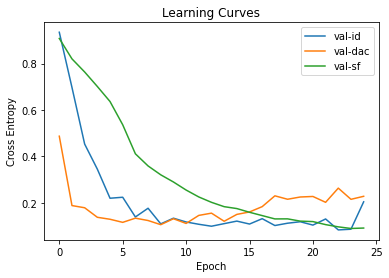

In [ ]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
#pyplot.plot(history.history['Dialogue-Act-Classification_loss'], label='train-dac')
pyplot.plot(history.history['val_Intent-Detection_loss'], label='val-id')
pyplot.plot(history.history['val_Dialogue-Act-Classification_loss'], label='val-dac')
pyplot.plot(history.history['val_Slot-Filling_loss'], label='val-sf')
pyplot.legend()
pyplot.show()

In [41]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/trains_multi_tasks_1")
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 24, 484)]    0           []                               
                                                                                                  
 bidirectional_21 (Bidirectiona  (None, 24, 200)     351600      ['input_8[0][0]']                
 l)                                                                                               
                                                                                                  
 bidirectional_22 (Bidirectiona  (None, 24, 200)     181200      ['bidirectional_21[0][0]']       
 l)                                                                                               
                                                                                            

In [55]:
label_list = list(y_tokenizer.word_index.keys())
index_list = list(y_tokenizer.word_index.values())

import random
#Predict the slots
i = int(input("Enter an index: "))   
print(test_df["sentences"][i])
prediction = model.predict(np.expand_dims(X_test[i],axis=0))
dac_prediction = (prediction[0] > 0.5).astype("int32")
print("Expected Dialogue Act : ",test_df["dac"][i])
print("Predicted Dialogue Act : ",dac_label_encoder.inverse_transform([np.argmax(dac_prediction, axis=None, out=None)]))

intent_prediction = (prediction[1] > 0.5).astype("int32")
print("Expected Intent : ",test_df["intents"][i])
print("Predicted Intent : ",intent_label_encoder.inverse_transform([np.argmax(intent_prediction, axis=None, out=None)]))

slots = [label_list[index_list.index(j)] for j in [np.argmax(x) for x in prediction[2][0][:]] if j in index_list][:-1]
print("Expected Slots : ",test_df["slots"][i])
print("Predicted Slots : ",slots)
print('*'*75)

Enter an index: 35
how long does it take to load the bananas 
Expected Dialogue Act :  QUESTION
Predicted Dialogue Act :  ['QUESTION']
Expected Intent :  time
Predicted Intent :  ['time']
Expected Slots :  O O O O O O O O B-food 
Predicted Slots :  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-food']
***************************************************************************


In [57]:
label_list = list(y_tokenizer.word_index.keys())
index_list = list(y_tokenizer.word_index.values())

import random
#Predict the slots
for i in random.sample(range(1, 1336), 7):
    print(i)
    print(test_df["sentences"][i])
    prediction = model.predict(np.expand_dims(X_test[i],axis=0))
    dac_prediction = (prediction[0] > 0.5).astype("int32")
    print("Expected Dialogue Act : ",test_df["dac"][i])
    print("Predicted Dialogue Act : ",dac_label_encoder.inverse_transform([np.argmax(dac_prediction, axis=None, out=None)]))
    
    intent_prediction = (prediction[1] > 0.5).astype("int32")
    print("Expected Intent : ",test_df["intents"][i])
    print("Predicted Intent : ",intent_label_encoder.inverse_transform([np.argmax(intent_prediction, axis=None, out=None)]))
    
    slots = [label_list[index_list.index(j)] for j in [np.argmax(x) for x in prediction[2][0][:]] if j in index_list][:-1]
    print("Expected Slots : ",test_df["slots"][i])
    print("Predicted Slots : ",slots)
    print('*'*75)

514
yeah 
Expected Dialogue Act :  CAT
Predicted Dialogue Act :  ['CAT']
Expected Intent :  other
Predicted Intent :  ['confirm']
Expected Slots :  O 
Predicted Slots :  ['O']
***************************************************************************
904
okay that it 
Expected Dialogue Act :  CAT
Predicted Dialogue Act :  ['CAT']
Expected Intent :  confirm
Predicted Intent :  ['other']
Expected Slots :  O O O 
Predicted Slots :  ['O', 'O', 'O']
***************************************************************************
599
and I need to where are the bananas oh the bananas so I have an engine in Avon but not a boxcar 
Expected Dialogue Act :  INFO
Predicted Dialogue Act :  ['INFO']
Expected Intent :  item
Predicted Intent :  ['item']
Expected Slots :  O O O O O O O B-food O O B-food O O O O B-vehicle O B-city O O O B-item 
Predicted Slots :  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-food', 'O', 'O', 'B-food', 'O', 'O', 'O', 'O', 'B-vehicle', 'O', 'B-city', 'O', 'O', 'O', 'B-item']
******